# Virtual Pruning

## Importing the digitized structure

In [1]:
from openalea.mtg import *
from numpy import *
import numpy as np
from importlib import reload
import numpy as np
import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()


In [2]:
from matplotlib.pyplot import *
import mtgplot as mp
reload(mp)


<module 'mtgplot' from '/Users/fboudon/Develop/oagit/virtualpruning-emma/notebooks/mtgplot.py'>

In [3]:
sw = mp.plot_tree(g)
sw

SceneWidget(scenes=[{'id': 'GtGQDLAq9ms98NX1CzOiPcZRQ', 'data': b'x\xda\xac\x9d\t|S\xc5\xda\xff\xd3\x1dC\xa1\x…

## Pruning procedure

To select a pruning point, we start from terminal points, trace back into the structure up to 3 layers. We check if the pruning point is valid by looking the depth of what it carries. If it is in average close to what is intended we select it. Else we select another one.

Point d'amélioration : tailler en fait au milieu de la n4.

In [4]:
import pruning ; reload(pruning)
from pruning import *

## Estimation of light interception

In [5]:
import lightestimation as le ; reload(le)
from lightestimation import *

In [6]:
sun, sky = get_light_sources()

In [7]:
print(sum(sun[2]))

535266.3208069891


In [8]:
scene = mp.representation(g, wood = False, leaves=True)

In [10]:
agg = caribu(scene, sun, sky)

start caribu...
Create light source ...  58  sources.
Convert scene for caribu
done in 124.21346092224121
Run caribu
made in 133.14440608024597


In [11]:
mp.plot_projection(scene, agg['irradiance'])

SceneWidget(scenes=[{'id': 'EUpLK2mAUoFcXVwOlAXI622T8', 'data': b'x\xda\x94\xdd\x07X\xd4\xd8\xe26p\xec\xd8\x1b…

In [12]:
agg2 = plantgllight(scene, sun, sky)


start plantgl light...
Create light source ...  58  sources.
Run plantGL
made in 18.980058908462524


In [13]:
#print(agg2)
mp.plot_projection(scene, agg2['irradiance'])

SceneWidget(scenes=[{'id': 'ocZ7xOckNCdRHH6raz2dvbVcg', 'data': b'x\xda\x94\xdd\x07\\\xd4\xd8\xc26p\xec\xd8\x1…

In [14]:
#print(min(agg['irradiance']),max(agg['irradiance']),np.mean(agg['irradiance']))
print(min(agg2['irradiance']),max(agg2['irradiance']),np.mean(agg2['irradiance']))


149.47883100124255 514245.49867360515 88971.28274429009


<AxesSubplot:>

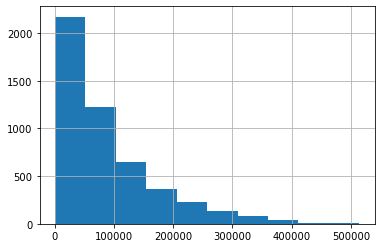

In [15]:
(agg2['irradiance']).hist()
#agg['irradiance'].hist()


[ 1.03833009e+00 -1.32034462e+03]


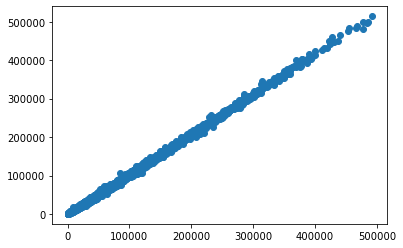

In [16]:
scatter(agg['irradiance'],agg2['irradiance'])
print(np.polyfit(agg['irradiance'],agg2['irradiance'],1))

In [17]:
extend_mtg_with_light(g, agg)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
extend_mtg_with_light(g, agg2)

In [ ]:
scene2 = mp.representation(g, wood = True, leaves=True)

In [ ]:
agg3 = plantgllight(scene2, sun, sky)

In [ ]:
mp.plot_projection(scene2, agg3['irradiance'])